<h1 style="text-align:center;font-size:50px;font-family:'Copperplate';">Analiza fantazijskih knjig</h1>

<h2 style="text-align:center;font-family:Verdana;font-size:40px;margin-bottom:1cm;"> Priprava </h2>

In [1]:
import pandas as pd
import zlato_desetletje as zld

In [2]:
pot = "C:\\Users\\Benjamin\\Desktop\\Šola\\FMF\\UVP\\UVP_Projektna_naloga_2024\\podatki_fantazijske_knjige.csv"
podatki = pd.read_csv(pot, index_col='Naslov')

In [3]:
podatki.fillna(0, inplace=True)

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Lestvice najboljših in analiza trendov </h3>

In [4]:
# Sprememba decimalnih števil, ki bi morala biti cela, v cela števila.
podatki['Dolžina'] = podatki['Dolžina'].astype(int, errors='ignore')
podatki['Leto izida'] = podatki['Leto izida'].astype(int, errors='ignore')
podatki['Število bralcev'] = podatki['Število bralcev'].astype(int, errors='ignore')

In [5]:
podatki['Desetletje'] = (podatki['Leto izida']//10)*10

In [6]:
podatki = podatki[['Avtor', 'Leto izida', 'Desetletje', 'Dolžina', 'Točke', 'Ocena', 'Število bralcev']]

In [7]:
podatki.reset_index(inplace=True)

In [8]:
podatki.drop_duplicates(subset='Naslov', keep='first', inplace=True)

In [9]:
podatki.set_index('Naslov', inplace=True)

In [10]:
# Izključitev knjige "Harry Potter and the Phylosopher's Stone", saj je upoštevana "Harry Potter and the Sorcerer's Stone"
# z istimi vrednostmi atributov
podatki.drop('Harry Potter and the Philosopher’s Stone (Harry Potter, #1)', axis='rows', inplace=True)

In [11]:
podatki

,Avtor,Leto izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,,
"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,1937,1930,366,5793,4.29,4067050
Lost Horizon,James Hilton,1933,1930,241,1276,3.95,22940
At the Mountains of Madness,H.P. Lovecraft,1931,1930,194,1185,3.81,55059
"Mary Poppins (Mary Poppins, #1)",P.L. Travers,1934,1930,209,1169,4.01,134801
"The Sword in the Stone (The Once and Future King, #1)",T.H. White,1938,1930,352,968,3.89,26897
...,...,...,...,...,...,...,...
"The Wizard of Eventide (The Goddess War, 3)",Kelley Skovron,2022,2020,400,18,4.14,78
"The Fury of the Gods (The Bloodsworn Saga, #3)",John Gwynne,2024,2020,528,15,4.47,106
"Age of Ash (Kithamar, #1)",Daniel Abraham,2022,2020,448,14,3.68,3424


In [12]:
po_desetletjih = podatki.groupby('Desetletje')

In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Priprava za iskanje zlatega desetletja </h3>

In [14]:
analiza_po_desetletjih = po_desetletjih.agg(
**{
    'Število knjig' : pd.NamedAgg(column='Točke', aggfunc='size'),
    'Kvaliteta' : pd.NamedAgg(column='Točke', aggfunc='mean'),
    'Povprečno število bralcev' : pd.NamedAgg(column='Število bralcev', aggfunc='mean'),
    'Število avtorjev' : pd.NamedAgg(column='Avtor', aggfunc=lambda x: len(x.unique()))
    
})

In [15]:
analiza_po_desetletjih.drop([0, 1840, 1890], inplace=True)

In [16]:
analiza_po_desetletjih['Kvaliteta'] = round(analiza_po_desetletjih['Kvaliteta'], 2)

In [17]:
# Beleženje rezultatov po kategorijah
zlate_tocke = {
    'Desetletje': [1900 + i*10 for i in range(2,13)],
    'Delež':[],
    'Kvaliteta':[],
    'Povprečno število bralcev':[],
    'Število avtorjev':[],
}

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:1cm;"> Podatke, ki potrebujemo za iskanje zlatega desetleja fantazijskega žanra, bomo zbirali sproti.</p>

<h2 style="text-align:center;font-family:Verdana;font-size:40px;margin-bottom:1cm;"> Lestvice najboljših </h2>

<p style="font-family:'Times New Roman';font-size:20px;"> Najprej si poglejmo najboljših 10 predstavnikov iz vsake kategorije.</p>

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Najkvalitetnejše knjige </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Poizvedimo najprej, katere knjige so najkvalitetnejše. Kot merilo kvalitete vzemimo št. točk oz. t. i. "score", kakor je navedeno na spletni strani. Točke upoštevajo št. bralcev, ki je ocenilo knjigo, ter povprečno oceno, ki so ji jo prisodili.</p>

In [18]:
naj_knjige_po_tockah = pd.DataFrame(podatki['Točke'].sort_values(ascending=False))

In [19]:
naj_knjige_po_tockah.reset_index(inplace=True)

In [20]:
naj_knjige_po_tockah.index += 1

In [21]:
naj_knjige_po_tockah.head(10)

,Naslov,Točke
1,"The Way of Kings (The Stormlight Archive, #1)",66172
2,"Words of Radiance (The Stormlight Archive, #2)",51565
3,"The Wise Man’s Fear (The Kingkiller Chronicle,...",43622
4,Harry Potter and the Sorcerer's Stone (Harry P...,25663
5,"A Game of Thrones (A Song of Ice and Fire, #1)",24076
6,"The Eye of the World (The Wheel of Time, #1)",21596
7,The Name of the Wind (The Kingkiller Chronicle...,20124
8,The Final Empire (Mistborn #1),17752
9,"Red Rising (Red Rising Saga, #1)",16497
10,Harry Potter and the Deathly Hallows (Harry Po...,16296


<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Najkvalitetnejši avtorji </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Sedaj analizirajmo avtorje po kvaliteti knjig, ki so jih napisali. Kot merilo zopet vzemimo število točk, le da tokrat avtorju pripišimo povprečje točk njegovih knjig.</p>

In [22]:
po_avtorjih = podatki.groupby('Avtor')

In [23]:
naj_avtorji_po_tockah = (pd.DataFrame(po_avtorjih['Točke'].mean())).sort_values(by='Točke',ascending=False)

In [24]:
naj_avtorji_po_tockah['Točke'] = round(naj_avtorji_po_tockah['Točke'], 2)

In [25]:
naj_avtorji_po_tockah.reset_index(inplace=True)

In [26]:
naj_avtorji_po_tockah.index += 1

In [27]:
naj_avtorji_po_tockah.head(10)

,Avtor,Točke
1,Patrick Rothfuss,21508.67
2,J.K. Rowling,9165.27
3,Brandon Sanderson,8929.54
4,Scott Lynch,8780.50
5,Robert Jordan,6818.79
6,Pierce Brown,6769.25
7,Neil Gaiman,6574.14
8,William Goldman,6363.00
9,Erin Morgenstern,5810.00
10,Terry Goodkind,5705.00


<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Najbolj brane knjige </h3>

<p style="font-family:'Times New Roman'; font-size:20px;margin-bottom:0.5cm;"> Kot zanimivost si poglejmo še, katere so najbolj brane knjige in najbolj brani avtorji ter rezultata primerjajmo z zgornjima. Kot kriterij sem vzel število ljudi, ki je ocenilo knjigo na spletni strani, saj dejanskega števila ljudi, ki so prebrali knjigo, ni mogoče zares ugotoviti.</p>

In [28]:
naj_knjige_po_bralcih = podatki.sort_values(by='Število bralcev', ascending=False)

In [29]:
naj_knjige_po_bralcih = pd.DataFrame(naj_knjige_po_bralcih['Število bralcev'])

In [30]:
naj_knjige_po_bralcih.reset_index(inplace=True)

In [31]:
naj_knjige_po_bralcih.index += 1

In [32]:
naj_knjige_po_bralcih.head(10)

,Naslov,Število bralcev
1,Harry Potter and the Sorcerer's Stone (Harry P...,10271334
2,"The Hunger Games (The Hunger Games, #1)",8859007
3,"Twilight (The Twilight Saga, #1)",6698056
4,Harry Potter and the Prisoner of Azkaban (Harr...,4291784
5,"The Hobbit (The Lord of the Rings, #0)",4067050
6,"Divergent (Divergent, #1)",4049910
7,Harry Potter and the Chamber of Secrets (Harry...,4017607
8,Animal Farm,3978536
9,Harry Potter and the Deathly Hallows (Harry Po...,3777239
10,Harry Potter and the Goblet of Fire (Harry Pot...,3777222


<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Najbolj brani avtorji </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Še po avtorjih </p>

In [33]:
naj_avtorji_po_bralcih = (pd.DataFrame(po_avtorjih['Število bralcev'].mean())).sort_values(by='Število bralcev',
                                                                                           ascending=False)

In [34]:
naj_avtorji_po_bralcih.reset_index(inplace=True)

In [35]:
naj_avtorji_po_bralcih.index += 1

In [36]:
naj_avtorji_po_bralcih.head(10)

,Avtor,Število bralcev
1,George Orwell,3978536.00
2,Suzanne Collins,3218892.40
3,J.K. Rowling,3139881.36
4,Alice Sebold,2376406.00
5,Stephenie Meyer,2246038.50
6,Veronica Roth,2214468.00
7,Antoine de Saint-Exupéry,2158323.00
8,Rebecca Yarros,1845910.00
9,Audrey Niffenegger,1800145.00
10,Yann Martel,1646466.00


<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Ugotovitve </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:1cm;"> Če sedaj še povzamemo zgornje zaključke in poskusimo narediti kakšen sklep, </p>

In [37]:
podatki.sort_values(by='Točke', ascending=False).head(10)[['Avtor', 'Točke']]

,Avtor,Točke
Naslov,,
"The Way of Kings (The Stormlight Archive, #1)",Brandon Sanderson,66172
"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,51565
"The Wise Man’s Fear (The Kingkiller Chronicle, #2)",Patrick Rothfuss,43622
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",J.K. Rowling,25663
"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,24076
"The Eye of the World (The Wheel of Time, #1)",Robert Jordan,21596
"The Name of the Wind (The Kingkiller Chronicle, #1)",Patrick Rothfuss,20124
The Final Empire (Mistborn #1),Brandon Sanderson,17752
"Red Rising (Red Rising Saga, #1)",Pierce Brown,16497


In [38]:
podatki.sort_values(by='Število bralcev', ascending=False).head(10)[['Avtor', 'Število bralcev']]

,Avtor,Število bralcev
Naslov,,
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",J.K. Rowling,10271334
"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,8859007
"Twilight (The Twilight Saga, #1)",Stephenie Meyer,6698056
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",J.K. Rowling,4291784
"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,4067050
"Divergent (Divergent, #1)",Veronica Roth,4049910
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",J.K. Rowling,4017607
Animal Farm,George Orwell,3978536
"Harry Potter and the Deathly Hallows (Harry Potter, #7)",J.K. Rowling,3777239


<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;margin-top:0.5cm;">lahko ugotovimo, da v splošnem velja, da najbolj brani avtorji pišejo najbolj brane knjige, prav tako pa najkvalitetnejši avtorji pišejo najkvalitetnejše knjige. To pomeni, da so analizirani podatki oz odvisnosti dokaj konsistentne.</p> 
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Vidimo lahko, da je med knjigami daleč najbolj popularna serija knjig o Harryju Potterju, ki ima med prvimi desetimi najbolj branimi knjigami kar pet knjig. Joanne Rowling je prav tako tretja po skupnem številu bralcev in druga po kvaliteti, kjer pa jo vsaj po kvaliteti posameznih del prekašata Patrick Rothfuss in Brandon Sanderson.</p>

<h2 style="text-align:center;font-family:Verdana;font-size:40px;margin-bottom:1cm;"> Analiza trendov</h2>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Zanima nas tudi podrobnejše dogajanje v fantazijskem žanru.</p> 
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;">Kot bralci bi se lahko vprašali, kako se tekom let in desetletij spreminjajo kvaliteta, dolžina in branost književnih del. Prav tako bi vsekakor želeli vedeti, ali so daljše knjige tudi kvalitetnejše ter ali ljudje raje berejo daljše ali krajše knjige.</p> 
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm">Iz rezultatov analize bomo poskusili napovedati trende na tem področju v prihodnosti.</p>

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Odvisnost kvalitete od dolžine </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm"> Radi bi videli, ali so daljše knjige kvalitetnejše. Pogledali bomo, koliko točk povprečno prejme vsaka knjiga iz posameznega razreda, pri čemer en razred predstavljajo vse tiste knjige, katerih števila strani dajo pri deljenju s 50 isti celi del.</p>

In [39]:
dolzina_kvaliteta = podatki[['Dolžina', 'Točke']]

In [40]:
dolzina_kvaliteta['Razred dolžine'] = (dolzina_kvaliteta['Dolžina']//50)*50

In [41]:
dolzina_kvaliteta

,Dolžina,Točke,Razred dolžine
Naslov,,,
"The Hobbit (The Lord of the Rings, #0)",366,5793,350
Lost Horizon,241,1276,200
At the Mountains of Madness,194,1185,150
"Mary Poppins (Mary Poppins, #1)",209,1169,200
"The Sword in the Stone (The Once and Future King, #1)",352,968,350
...,...,...,...
"The Wizard of Eventide (The Goddess War, 3)",400,18,400
"The Fury of the Gods (The Bloodsworn Saga, #3)",528,15,500
"Age of Ash (Kithamar, #1)",448,14,400


In [42]:
po_dolzini = dolzina_kvaliteta.groupby('Razred dolžine')

In [43]:
dolzina_tocke = pd.DataFrame(po_dolzini['Točke'].mean())

In [44]:
dolzina_tocke

,Točke
Razred dolžine,
0,363.74
50,144.61
100,353.71
150,570.47
200,613.49
250,393.81
300,502.80
350,588.92
400,602.32


<Axes: xlabel='Razred dolžine', ylabel='Točke'>

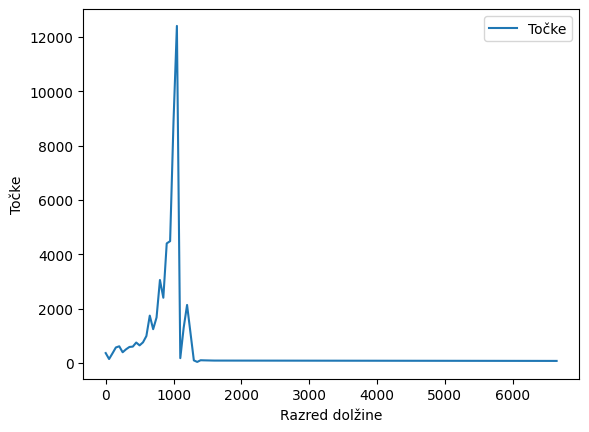

In [45]:
dolzina_tocke.plot(xlabel='Razred dolžine', ylabel='Točke')

In [46]:
podatki[podatki['Dolžina'] > 1700]

,Avtor,Leto izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,,
"Worm (Parahumans, #1)",Wildbow,2013,2010,6680,75,4.60,9403


<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;margin-top:0.5cm;"> Opazimo, da ima samo ena knjiga ekstremno dolžino. Da bo graf bolj informativen in da bomo lažje razbrali trend pri ostalih knjigah, te knjige ne upoštevamo pri ugotavljanju odvisnosti kvalitete od dolžine. Podobno storimo pri raziskovanju odvisnosti števila bralcev od dolžine.</p>

<Axes: xlabel='Razred dolžine', ylabel='Točke'>

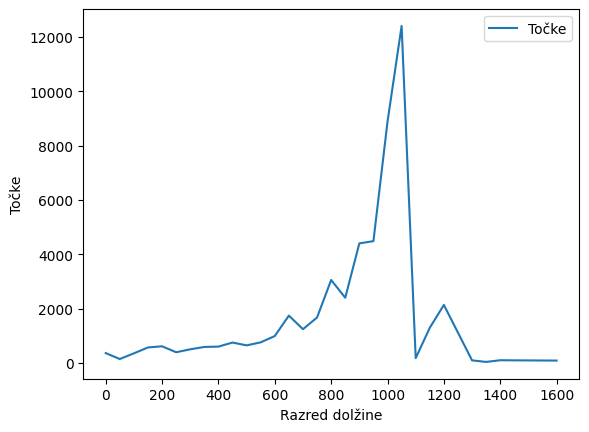

In [47]:
dolzina_tocke.drop(6650).plot(xlabel='Razred dolžine', ylabel='Točke')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Odvisnost števila bralcev od dolžine </h3>

In [48]:
podatki['Razred dolžine'] = (podatki['Dolžina']//50)*50 

In [49]:
po_razredih_dolzine = podatki.groupby('Razred dolžine')

In [50]:
dolzina_bralci = pd.DataFrame(po_razredih_dolzine['Število bralcev'].sum()) 

In [51]:
dolzina_bralci.drop(6650, inplace=True)

<Axes: xlabel='Razred dolžine', ylabel='Skupno število bralcev (v desetinah milijonov)'>

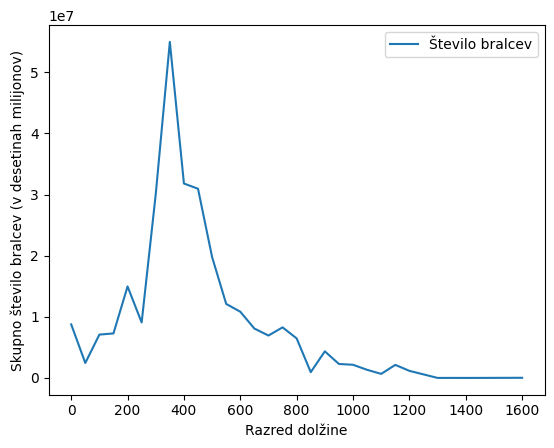

In [52]:
dolzina_bralci.plot(ylabel='Skupno število bralcev (v desetinah milijonov)')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Odvisnost deleža izdanih knjig od desetletja </h3>

In [53]:
analiza_st_knjig = pd.DataFrame(analiza_po_desetletjih['Število knjig'])

In [54]:
analiza_st_knjig.reset_index(inplace=True)

In [55]:
analiza_st_knjig.index += 1

In [56]:
analiza_st_knjig

,Desetletje,Število knjig
1,1920,2
2,1930,51
3,1940,45
4,1950,51
5,1960,73
6,1970,137
7,1980,323
8,1990,367
9,2000,586
10,2010,1535


<Axes: ylabel='Deleži knjig'>

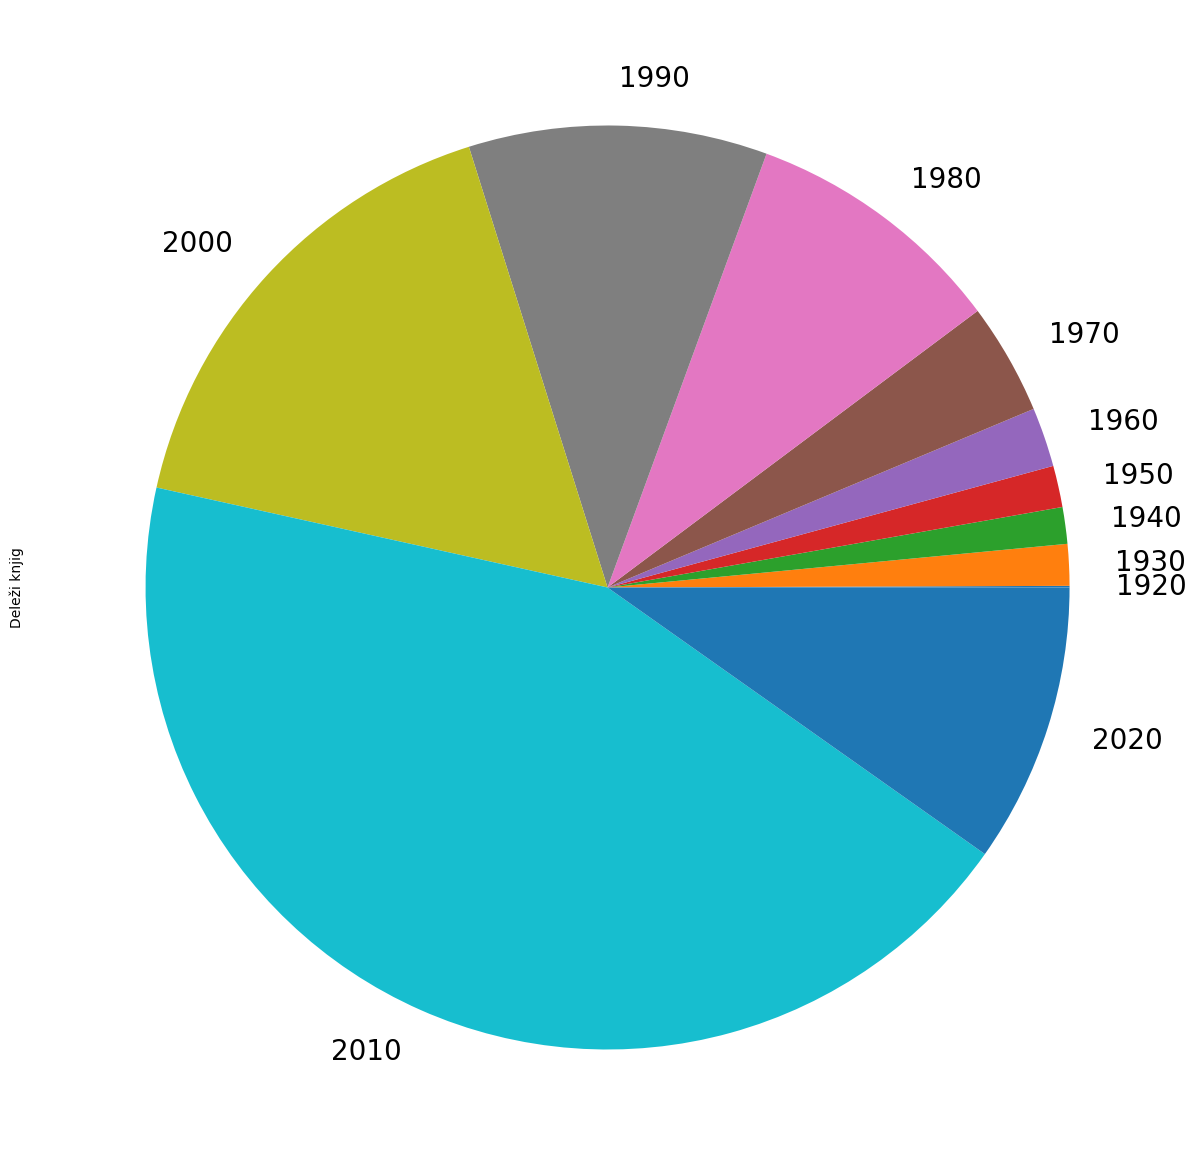

In [57]:
analiza_po_desetletjih['Število knjig'].plot(kind='pie', figsize=(15, 15), fontsize=20, label='Deleži knjig')

In [58]:
zlate_tocke['Delež'] = zld.mesto_v_tabeli(analiza_st_knjig, 'Število knjig')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Odvisnost števila avtorjev od desetletja </h3>

In [59]:
analiza_avtorji = pd.DataFrame(analiza_po_desetletjih['Število avtorjev'])

In [60]:
analiza_avtorji

,Število avtorjev
Desetletje,
1920,2
1930,20
1940,35
1950,26
1960,40
1970,65
1980,141
1990,154
2000,236


<Axes: xlabel='Desetletje', ylabel='Število avtorjev'>

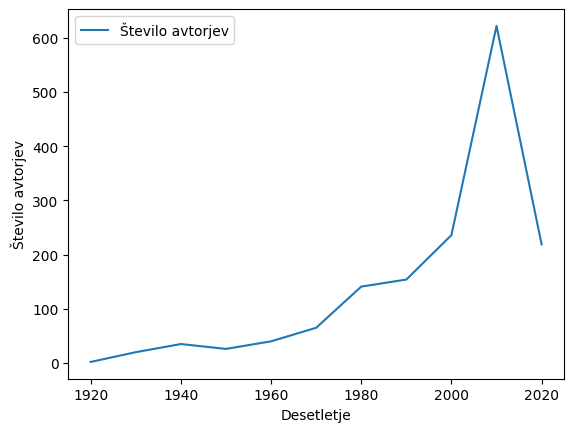

In [61]:
analiza_avtorji.plot(ylabel='Število avtorjev')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Odvisnost dolžine knjige od desetletja izida </h3>

In [62]:
leto_dolzina = po_desetletjih.agg(
    **{
'Dolžina': pd.NamedAgg(column='Dolžina', aggfunc='mean')
    })

In [63]:
leto_dolzina.drop([0, 1840, 1890], inplace=True)

In [64]:
leto_dolzina

,Dolžina
Desetletje,
1920,294.00
1930,186.84
1940,238.33
1950,264.43
1960,223.81
1970,281.14
1980,336.57
1990,418.67
2000,433.24


<Axes: xlabel='Desetletje', ylabel='Povprečna dolžina knjig (strani)'>

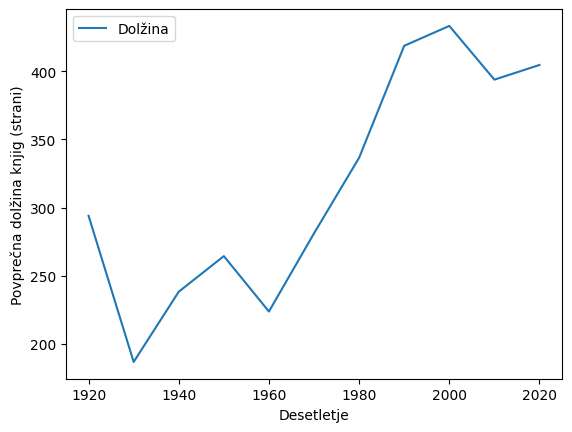

In [93]:
leto_dolzina.plot(ylabel='Povprečna dolžina knjig (strani)')

In [66]:
zlate_tocke['Število avtorjev'] = zld.mesto_v_tabeli(analiza_avtorji, 'Število avtorjev')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Odvisnost kvalitete knjige od desetletja izida </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Oglejmo si, kako se je spreminjala kvaliteta knjig v odvisnosti od desetletja izida. Pri tem glejmo samo knjige z znanim letom izida, ki so izšle leta 1920 ali kasneje. </p>

In [67]:
izid_leto = po_desetletjih.agg(
**{
    'Kvaliteta': pd.NamedAgg(column='Točke', aggfunc='mean')
})

In [68]:
izid_leto.drop([0, 1840, 1890], axis='index', inplace=True)

In [69]:
izid_leto['Kvaliteta'] = round(izid_leto['Kvaliteta'], 2)

In [70]:
izid_leto

,Kvaliteta
Desetletje,
1920,217.00
1930,404.39
1940,353.73
1950,1241.12
1960,787.73
1970,1087.31
1980,1229.12
1990,1174.95
2000,664.94


<Axes: xlabel='Desetletje', ylabel='Točke'>

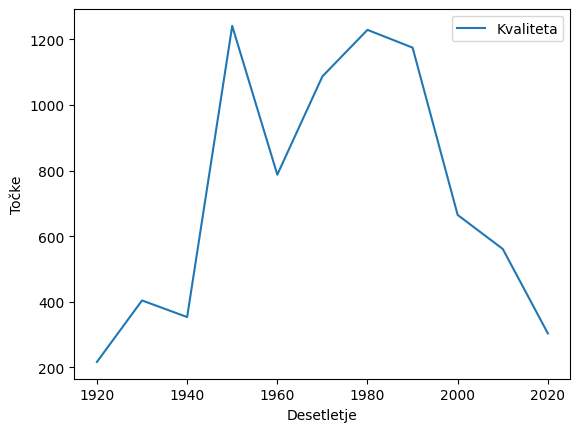

In [71]:
izid_leto.plot(ylabel='Točke')

In [72]:
analiza_kvalitete = pd.DataFrame(analiza_po_desetletjih['Kvaliteta'])

In [73]:
zlate_tocke['Kvaliteta'] = zld.mesto_v_tabeli(analiza_kvalitete, 'Kvaliteta')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Odvisnost povprečnega števila bralcev od desetletja </h3>

In [74]:
analiza_bralci = pd.DataFrame(analiza_po_desetletjih['Povprečno število bralcev'])

<Axes: xlabel='Desetletje', ylabel='Povprečno število bralcev'>

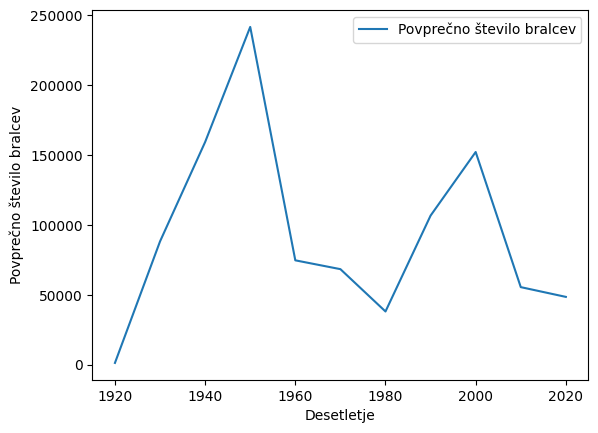

In [75]:
analiza_bralci.plot(ylabel='Povprečno število bralcev')

In [76]:
zlate_tocke['Povprečno število bralcev'] = zld.mesto_v_tabeli(analiza_bralci, 'Povprečno število bralcev')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Ugotovitve</h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Iz grafov zgoraj razberemo marsikatero značilnost fantazijskega žanra.</p> 
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Najprej si oglejmo od časa neodvisne spremenljivke, to sta odvisnosti kvalitete in branosti od dolžine. Ugotovimo, da medtem ko so daleč najkvalitetnejše tiste knjige, ki imajo med 950 in 1050 strani, pa bralci večinoma posegajo po krajših, med 350 in 450 strani dolgimi knjigami, ki so  slabše kakovosti.  </p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm"> Po drugi strani pa lahko opazimo številne časovne odvisnosti glede na desetletje izida.</p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm"> Če se osredotočimo samo na kvantitativno interpretacijo fantazijskega žanra, potem lahko zaznamo, da se je tekom desetletij število napisanih knjig močno povečalo, prav tako pa število njihovih piscev.</p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm"> 
Po drugi strani lahko opazimo dve obdobji višje kvalitete, in sicer v 50-ih letih prejšnjega stoletja ter od 70-ih let do preloma tisočletja. Prvi "skok" je opazno vplival na širšo bralno javnost, medtem ko drugi očitno ni neposredno odvisen od kvalitete.</p>


In [77]:
petdeseta = po_desetletjih.get_group(1950)

In [78]:
petdeseta.sort_values('Število bralcev', ascending=False).head(10)

,Avtor,Leto izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev,Razred dolžine
Naslov,,,,,,,,
"The Lion, the Witch and the Wardrobe (Chronicles of Narnia, #1)",C.S. Lewis,1950,1950,206,6133,4.24,2850027,200
"The Fellowship of the Ring (The Lord of the Rings, #1)",J.R.R. Tolkien,1954,1950,398,7350,4.39,2846557,350
"The Two Towers (The Lord of the Rings, #2)",J.R.R. Tolkien,1954,1950,322,6078,4.49,993733,300
"The Return of the King (The Lord of the Rings, #3)",J.R.R. Tolkien,1955,1950,404,5961,4.57,925694,400
The Lord of the Rings,J.R.R. Tolkien,1954,1950,1216,2456,4.53,685563,1200
"The Chronicles of Narnia (The Chronicles of Narnia, #1-7)",C.S. Lewis,1956,1950,767,1857,4.28,661598,750
"The Magician’s Nephew (Chronicles of Narnia, #6)",C.S. Lewis,1955,1950,221,3520,4.05,551589,200
"The Voyage of the Dawn Treader (Chronicles of Narnia, #3)",C.S. Lewis,1952,1950,248,3121,4.09,475952,200
"Prince Caspian (Chronicles of Narnia, #2)",C.S. Lewis,1951,1950,240,2689,3.98,446232,200


In [79]:
devetdeseta = po_desetletjih.get_group(1990)

In [80]:
devetdeseta.sort_values('Število bralcev', ascending=False).head(10)

,Avtor,Leto izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev,Razred dolžine
Naslov,,,,,,,,
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",J.K. Rowling,1997,1990,309,25663,4.47,10271334,300
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",J.K. Rowling,1999,1990,435,14291,4.58,4291784,400
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",J.K. Rowling,1998,1990,352,14137,4.43,4017607,350
"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,1996,1990,835,24076,4.44,2530213,800
"The Golden Compass (His Dark Materials, #1)",Philip Pullman,1995,1990,399,11587,4.02,1541979,350
"Outlander (Outlander, #1)",Diana Gabaldon,1991,1990,0,64,4.26,1074070,0
"A Clash of Kings (A Song of Ice and Fire, #2)",George R.R. Martin,1998,1990,1009,11426,4.42,949597,1000
"Good Omens: The Nice and Accurate Prophecies of Agnes Nutter, Witch",Terry Pratchett,1990,1990,491,9004,4.26,765817,450
"Wicked: The Life and Times of the Wicked Witch of the West (The Wicked Years, #1)",Gregory Maguire,1995,1990,406,2647,3.54,601134,400


<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm"> Po zgornjih dveh tabelah sodeč lahko sklepamo, da sta v prvem primeru večje poseganje po knjigah tistega časa sprožila seriji Gospodar prstanov in Zgodbe iz Narnie, v drugem pa serija o Harryju Potterju in pentalogija Pesem ledu in ognja</p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm"> Pri tem velja poudariti, da je bila spletna stran <a href='https://www.goodreads.com'>https://www.goodreads.com</a> ustvarjena januarja leta 2007 in da zgornji rezultati tako ne odražajo števila ljudi, ki je v določenih desetletjih bralo fantazijske knjige in jih presojalo. Podatki nam povedo samo, kako na dane knjige bralci gledajo v sodobnem času.</p>

<h2 style="text-align:center;font-family:Verdana;font-size:40px;margin-bottom:1cm;"> Iskanje zlatega desetletja </h2>

<p style="font-family:'Times New Roman';font-size:20px;"> Za konec si poglejmo še, katera so bila tista "zlata leta" fantazijskega žanra, tj. v katerem desetletju je bil fantazijski žanr najboljši. </p> <p style="font-family:'Times New Roman';font-size:20px;">To bomo ugotovili tako, da bomo pogledali razvrstitev desetletij po določenih kategorijah, jim vsakič pripisali neko število točk, na koncu pa točke sešteli in kot najboljše desetletje razglasili tisto desetletje, ki bo imelo največ točk.</p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Omenjene kategorije bodo: <ul style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.3cm">
    <li> delež knjig, ki so bile napisane v desetletju,</li>
    <li> povprečna kvaliteta knjig,</li>
    <li> povprečno število bralcev, ki je prebralo knjige iz določenega desetletja in</li>
    <li> število avtorjev, ki je ustvarjalo v posameznem desetletju.</li>
    </ul></p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Pri tem bomo izločili knjige, ki nimajo navedenega leta objave, gledali pa bomo samo knjige, objavljene od leta 1920 naprej. </p>

In [81]:
vrstni_red = pd.DataFrame(zlate_tocke)

In [82]:
vrstni_red

,Desetletje,Delež,Kvaliteta,Povprečno število bralcev,Število avtorjev
0,1920,0,0,0,0
1,1930,1,3,6,1
2,1940,2,2,9,3
3,1950,3,10,10,2
4,1960,4,6,5,4
5,1970,5,7,4,5
6,1980,6,9,1,6
7,1990,7,8,7,7
8,2000,8,5,8,9
9,2010,9,4,3,10


In [83]:
# Računanje vsot prejetih točk
seznam_vsot = []
for i in range(len(vrstni_red)):
    vsota = 0
    for j in range(1, 5):
        vsota += vrstni_red.iloc[i, j]
    seznam_vsot.append(vsota)

slovar = {'Desetletje':[1920 + i*10 for i in range(0, 11)], 'Skupne točke' : seznam_vsot}
skupne_tocke = pd.DataFrame(slovar)

In [92]:
vrstni_red_po_tockah = vrstni_red.merge(skupne_tocke, how='outer', on='Desetletje')

In [85]:
vrstni_red_po_tockah.sort_values(by=['Skupne točke', 'Desetletje'], ascending=[False, True], inplace=True)

In [86]:
vrstni_red_po_tockah.reset_index(inplace=True)

In [87]:
vrstni_red_po_tockah.index += 1

In [105]:
vrstni_red_po_tockah

,Desetletje,Delež,Kvaliteta,Povprečno število bralcev,Število avtorjev,Skupne točke
0,1920,0,0,0,0,0
1,1930,1,3,6,1,11
2,1940,2,2,9,3,16
3,1950,3,10,10,2,25
4,1960,4,6,5,4,19
5,1970,5,7,4,5,21
6,1980,6,9,1,6,22
7,1990,7,8,7,7,29
8,2000,8,5,8,9,30
9,2010,9,4,3,10,26


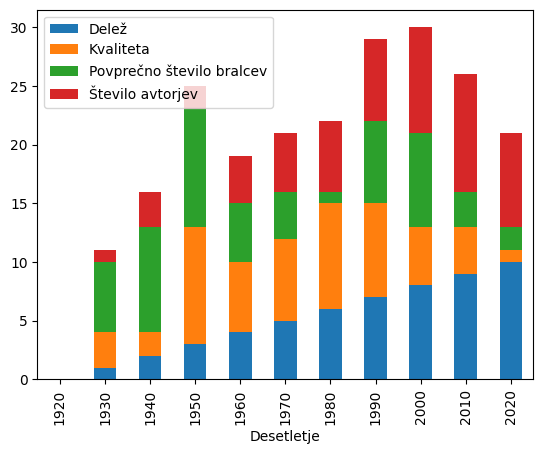

In [91]:
graf_desetletij = vrstni_red[['Desetletje', 'Delež', 'Kvaliteta', 'Povprečno število bralcev',
                                        'Število avtorjev']].set_index('Desetletje').plot(kind='bar', stacked = True)

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Ugotovitve </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:1cm;"> Ugotovimo lahko, da so bila prva leta novega tisočletja zlata leta fantazijskega žanra, ki sodeč po trendu, ki se nakazuje na grafu zgoraj, še dolgo ne bodo presežena.</p>

<h2 style='text-align:center'> <div style="font-size : 30px; font-style : Verdana; text-align : center "> Zaključki </div> </h2>

<p style="font-family:'Times New Roman';font-size:20px;"> Ta projektna naloga je pokazala nekaj ključnih značilnosti fantazijskega žanra. Nakazala je, da so najkvalitetnejše knjige tiste s po 950-1050 stranmi, najbolj brane pa tiste s 350-450 stranmi. Z analizo podatkov smo prišli do sklepa, da se s časom število izdanih knjig na desetletni ravni povečuje, prav tako tudi njihova dolžina in število piscev fantazijske literature. Po drugi strani sta kvaliteta in branost knjig po začetni rasti in dveh dobrih obdobjih začeli strmo padati.</p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm"> Čeprav je, kakor vedno, napovedovanje prihodnjega dogajanja precej negotovo, lahko postavimo domnevo, da se bodo ti trendi v prihodnosti nadaljevali. Iz tega sledi tudi sklep, da so zlata leta žanra, torej prvo desetletje novega tisočletja, že minila.</p>